## Importing Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Importing from SQL

In [ ]:
# Importing from SQL
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute('select * from Employee order by BirthDate')
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

#### 2. Importing flat files

In [ ]:
# Importing from CSV
df = pd.read_csv('prosperLoanData.csv')
titanic = pd.read_csv('titanic_data.csv')

In [42]:
df = pd.read_csv('prosperLoanData.csv', header = None) # Use this if the header is not available
col_names = ['day', 'year', 'month']
df = pd.read_csv('prosperLoanData.csv', header = None, names = col_names) # fill col names from list

#### 3. Importing from the web

In [ ]:
# Check how to import HTML and XML

## PythonToolbox

In [5]:
# Lambda functions with map
nums = [2, 4, 6, 8, 10]
result = map(lambda a: a ** 2, nums)

In [ ]:
# Map can be used to rename values in a categorical series
mapping_sex = {'male':0, 'female':1}
titanic['Sex'] = titanic_df['Sex'].map(mapping_sex)

In [ ]:
result = filter(lambda x:x[0:2] == 'RT', tweets_df['text']) # first is the func & then the series on where to apply

In [17]:
# ZIP takes iterables and resurt tuples
x = [1, 2, 3]
y = ['a', 'b', 'c']
z = [100, 200, 300]

list_labels = ['x', 'y', 'z']
list_cols = [x, y, z]
zipped = list(zip(list_labels, list_cols))
data = dict(zipped)
exam = pd.DataFrame(data).reset_index()

## Cleaning Data

## Pandas Foundation

In [ ]:
df.shape

In [ ]:
titanic.columns

In [9]:
df.iloc[:5,:] # till the 5th first row

In [10]:
df.iloc[-5:,:] # fifth last row till the end of the index

In [11]:
df.head(2)

In [12]:
df.tail(2)

In [13]:
df.info()

In [14]:
df.LoanNumber.values

In [15]:
df.describe()

In [19]:
df.Occupation.describe() # Description of categorical data

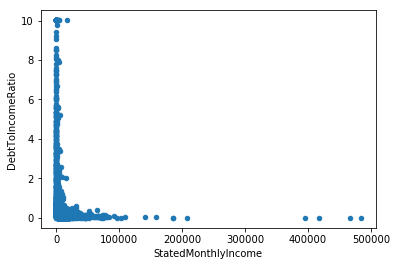

In [49]:
df.plot(x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio', kind = 'scatter')
plt.show()

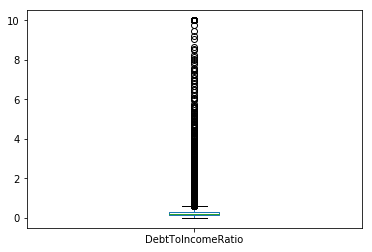

In [50]:
df.plot(x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio', kind = 'box')
plt.show()

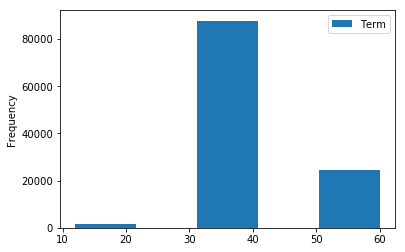

In [58]:
df.plot(x = 'StatedMonthlyIncome', y = 'Term', kind = 'hist', bins = 5)
plt.show()

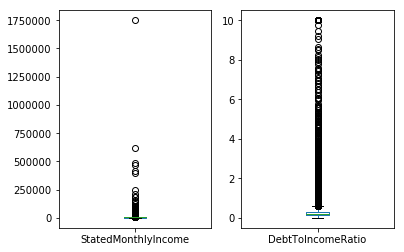

In [61]:
lists = ['StatedMonthlyIncome', 'DebtToIncomeRatio']
df[lists].plot(kind = 'box', subplots=True)
plt.show()

In [ ]:
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

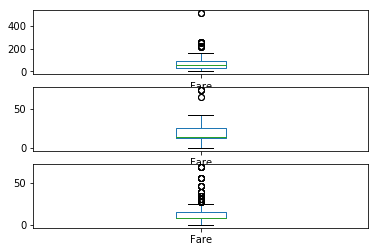

In [73]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

titanic.loc[titanic['Pclass'] == 1].plot(ax=axes[0], y='Fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['Pclass'] == 2].plot(ax=axes[1], y='Fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['Pclass'] == 3].plot(ax=axes[2], y='Fare', kind='box')

plt.show()

#### Time Series

In [ ]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15' : '2010-12-31']


In [ ]:
# In a time series if a date is missig you use the below
ts4 = ts2.reindex(ts1.index, method='ffill')
ts4 = ts2.reindex(ts1.index, method='bfill')

#### Resampling Time Series

In [ ]:
# Resampling data frames to aggreagte and study data within a specific time series 
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df1 = df['Temperature'].resample('D').mean()

In [ ]:
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-08']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-02']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

In [ ]:
# Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in 
# time series data and highlight long-term trends
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

#### Resampling and method chaining

In [ ]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = august.resample('D').max().rolling(window=7).mean()

In [ ]:
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

In [8]:
# 14 raws contains the below str in it
titanic.Ticket.str.contains('CA.').sum()

14

In [ ]:
# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

In [ ]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

In [ ]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

In [ ]:
# Buid a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime(la['Date (MM/DD/YYYY)']+' '+la['Wheels-off Time'])

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

In [ ]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped.date.astype(str)

In [ ]:
# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

In [ ]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

In [ ]:
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-04':'2011-06', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-01', 'dry_bulb_faren'].median())

In [ ]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

#### Slicing Time Series

In [ ]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:,:'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, 'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:,'Romney':]

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp.loc['2008':]

# Print the output of right_columns.head()
print(right_columns.head())


In [ ]:
# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[['United States','United Kingdom','China']])

#### Plotting time series

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()


In [ ]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


In [ ]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2, 1, 1)
plt.plot(view, color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation = 45)

# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2, 1, 2)
plt.plot(view, color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation = 45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25, 0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()


## Manipulating Data

#### Pivoting

In [2]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday', columns='city', values='visitors')

In [ ]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index = 'weekday', columns = 'city')

In [ ]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')

# Print count_by_weekday
print(count_by_weekday1)

# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

# Verify that the same result is obtained
print('==========================================')
print(count_by_weekday1.equals(count_by_weekday2))

In [ ]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)

# Print signups_and_visitors
print(signups_and_visitors)

# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index='weekday', aggfunc=sum, margins=True)

# Print signups_and_visitors_total
print(signups_and_visitors_total)

In [ ]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal',aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

#### Group by

In [7]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('Pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['Age','Fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max', 'median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('Age','max')])

# Print the median fare in each class
print(aggregated.loc[:, ('Fare','median')])

Pclass
1    80.0
2    70.0
3    74.0
Name: (Age, max), dtype: float64
Pclass
1    60.2875
2    14.2500
3     8.0500
Name: (Fare, median), dtype: float64


In [ ]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life','fertility']\
.transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = ((standardized['life'] < -3) | (standardized['fertility'] > 3))

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
print(gm_outliers)

#### Apply with groupby

In [15]:
def c_deck_survival(gr):

    c_passengers = gr['Cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'Survived'].mean()

In [16]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('Sex')

# Call by_sex.apply with the function c_deck_survival and print the result
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)

Sex
female    0.888889
male      0.343750
dtype: float64


#### Filter with groupby

In [ ]:
# Read the CSV file into a DataFrame: sales
sales = pd.read_csv('sales.csv', index_col='Date', parse_dates=True)

# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company.Units.sum()
print(by_com_sum)

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g:g['Units'].sum() > 35)
print(by_com_filt)

#### Map with groupby

In [ ]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10).survived.mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass']).survived.mean()
print(survived_mean_2)

#### drop Duplicates

In [18]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

#### IS IN Special

In [ ]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = ((medals.Edition >= 1952) & (medals.Edition<= 1988))

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped.Sport.nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)


In [ ]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc['1952':'1988', ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())


#### pd.Categorical

In [ ]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()


## Merging & Concatenating data

#### Compute yearly growth

In [ ]:
# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

#### Concatenate

In [ ]:
# Concatenate weather_max and weather_mean horizontally: weather
weather = pd.concat([weather_max, weather_mean], axis=1)

In [ ]:
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'],axis=1, join='inner')

# Print medals
print(medals)

In [ ]:
# Resample and tidy china: china_annual
china_annual = china.resample('A').pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], join='inner', axis=1)

# Resample gdp and print
print(gdp.resample('10A').last())

#### Merging Dataframe
It surpasses concat because we can merge on multiple columns

In [ ]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city', suffix=)

## Histogram equalization in images

In [ ]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), normed=True, color = 'red', alpha =0.4)

# Display the plot
plt.show()


In [ ]:
# Load the image into an array: image
image = plt.imread('640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()

In [ ]:
# Load the image into an array: image
image = plt.imread('hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()
